# Mathematics for Data Science from scratch_DE_Nelson_2021

### Problem Statement

**A user added a new record to a dataset but forgot to indicate the value for the variable (y). This
variable (y ) contains either the value 1 or 2.
As a data scientist, you need to develop a way that uses the database to guess the missing value
and autocomplete that field for them. You will need to write a function that can classify a new record
into 1 or 2. You will simply find the closest observation and assign its value for the missing variable
(y) as the missing value. The distance used to make the comparison between the two observations
can be either Euclidean or Manhattan. This is the same principle by which K-Nearest Neighbors
(KNN) Algorithm, a popular distance-based machine learning algorithm, works.**


**A few things to note:*
- ● Write the nearest_neighbor_predict() function. It takes three arguments:
- ○ Training set features (train_features)
- ○ Training set target (train_target )
- ○ New observation features (new_features)
- ● You can use the euclidean or manhattan function to calculate the distance. This function
    should take in the train_features values and new_features as the parameters.
- ● Use the argmin() function to return the shortest distance.

In [1]:
#We import our libraries for statistical use and hyperparameter tunning.
import numpy as np
import pandas as pd
from scipy.spatial import distance
import seaborn as sns #Python library for Visualization
import matplotlib.pyplot as plt #Data Visualization
import plotly as py # Data plotting

In [2]:
#Lets define the dataset

columns = ['y', 'x1', 'x2', 'x3', 'x4', 'x5']

train_df = pd.DataFrame([[1.0, 38.5, 6.9, 18.9, 3.0, 5.0], [1.0, 38.0, 8.5, 19.2, 9.0, 17.0], [1.0, 34.7, 10.3, 19.8, 1.0, 9.0], [1.0, 45.9, 11.1, 17.5, 11.0, 23.0], [1.0, 42.4, 10.0, 19.9, 6.0, 14.0], [1.0, 46.0, 10.2, 20.5, 3.0, 12.0], [2.0, 77.7, 13.2, 39.3, 3.0, 17.0], [2.0, 69.8, 11.1, 31.4, 12.0, 23.0], [2.0, 78.2, 19.4, 33.2, 4.0, 9.0], [2.0, 55.5, 7.8, 29.6, 1.0, 25.0], [2.0, 74.3, 16.0, 34.2, 14.0, 17.0], [2.0, 78.3, 12.3, 42.6, 23.0, 23.0], [2.0, 74.0, 18.1, 49.0, 8.0, 9.0], [2.0, 71.4, 20.1, 60.4, 2.0, 10.0], [3.0, 85.0, 17.8, 56.1, 14.0, 14.0], [3.0, 79.8, 9.8, 44.8, 9.0, 10.0], [3.0, 72.0, 10.2, 37.3, 7.0, 9.0], [3.0, 95.3, 11.0, 51.5, 15.0, 23.0], [3.0, 69.3, 9.5, 42.3, 4.0, 9.0], [3.0, 89.8, 11.2, 58.2, 24.0, 25.0]
], columns=columns)

# previewing the dataset
train_df.head()

,y,x1,x2,x3,x4,x5
0,1.0,38.5,6.9,18.9,3.0,5.0
1,1.0,38.0,8.5,19.2,9.0,17.0
2,1.0,34.7,10.3,19.8,1.0,9.0
3,1.0,45.9,11.1,17.5,11.0,23.0
4,1.0,42.4,10.0,19.9,6.0,14.0


In [3]:
train_df.shape#preview the no. of records

(20, 6)

In [4]:
#check for Index range,data columns and entries in our dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       20 non-null     float64
 1   x1      20 non-null     float64
 2   x2      20 non-null     float64
 3   x3      20 non-null     float64
 4   x4      20 non-null     float64
 5   x5      20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


In [5]:
#Checking for duplicates in our dataset
sum(train_df.duplicated())

0

In [6]:
#we import the sqrt function used to get the square root of the given number in Python
from math import sqrt

In [7]:
#we calculate the Euclidean distance between the two numbers(x,y)
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (pd.to_numeric(row1[i], errors='coerce') - pd.to_numeric(row2[i], errors='coerce'))**2
    return sqrt(distance)

**We need to locate similar k-means**
- K-means clustering is a clustering algorithm that aims to partition n observations into k clusters. Initialisation – K initial “means” (centroids) are generated at random Assignment – K clusters are created by associating each observation with the nearest centroid Update. 

In [8]:
#we now locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda x: x[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [9]:
#We now create a prediction 
def nearest_neighbor_predict(train_features, train_target, new_features): 
    # YOUR CODE GOES BELOW
  #
  neighbors = get_neighbors(train_features, train_target, new_features)
  output_values = [row[-1] for row in neighbors]
  prediction = max(set(output_values), key=output_values.count)
  return prediction

In [10]:
#We now define our features
train_features = train_df.drop('y', axis=1)
train_target = train_df['y'] # YOUR CODE GOES HERE...Hint: this is the Y column
train_features = train_features.applymap(lambda x: float(x))
train_features.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
dtype: object

In [11]:
#lets visualize few records
train_features.head()

,x1,x2,x3,x4,x5
0,38.5,6.9,18.9,3.0,5.0
1,38.0,8.5,19.2,9.0,17.0
2,34.7,10.3,19.8,1.0,9.0
3,45.9,11.1,17.5,11.0,23.0
4,42.4,10.0,19.9,6.0,14.0


In [12]:
#Lets create a new record and name it test_df
test_df = np.array([72, 14, 39, 8, 16])

In [13]:
#test_df=np.array([72, 14, 39, 8, 16])
#test_df=test_df.astype(float)
#print(test_df)

**Convert a 1D array to a 2D array in numpy**

When it's possible, new will be just a view of the initial array a, meaning that the data are shared. 
In some cases, though, new array will be acopy instead. Note that np.reshape also accepts an optional keyword order that lets you switch from row-major C order to column-major Fortran order. np.reshape is the function version of the a.reshape method.

In [14]:
# we now convert it to two dimension.
test_df=np.array([72, 14, 39, 8, 16])
test_df1=test_df[:,np.newaxis]

In [15]:
test_df.dtype

dtype('int32')

In [16]:
test_df1

array([[72],
       [14],
       [39],
       [ 8],
       [16]])

**Why Scaling the data for KNN?**

it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN

Let's see an example of distance calculation using two features whose magnitudes/ranges vary greatly.
Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

- We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude

In [17]:
#sample test
x = train_df.iloc[:, [2, 3]].values

In [18]:
#Building the Model
#We use KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
#We always assume the max number of clusters would be 10
# We  can judge the number of clusters by doing averaging
from sklearn.cluster import KMeans
wcss=[]

# We use the below static code to get max number of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#inertia_ is the formula used to segregate the data points into clusters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
"""""from sklearn.neighbors import KNeighborsClassifier
#test_scores = []
train_scores = []
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(train_features,test_df1)
    
    train_scores.append(knn.score(train_features,test_df1))
    test_scores.append(knn.score(test_df1,test_df1))"""

'""from sklearn.neighbors import KNeighborsClassifier\n#test_scores = []\ntrain_scores = []\nfor i in range(1,15):\n\n    knn = KNeighborsClassifier(i)\n    knn.fit(train_features,test_df1)\n    \n    train_scores.append(knn.score(train_features,test_df1))\n    test_scores.append(knn.score(test_df1,test_df1))'

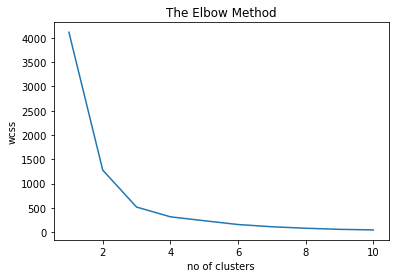

In [20]:
#Visualize the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

* It is clear from the figure that we should take the number of clusters equal to 5, as the slope of the curve is not steep enough after it. when we zoom out this curve then you will see that last elbow comes at k=5, it would be difficult to visualize the elbow if we choose the higher range. This why its usually recommended to pick a range of 1 to 11 Therefore our k=5

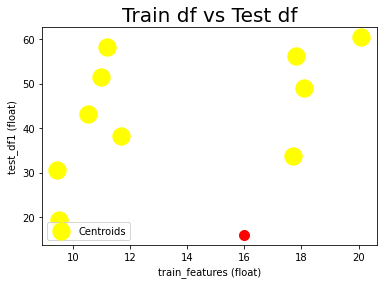

In [21]:
#Model Build
#our data set is for  unsupervised learning therefore we will use "fit_predict()"
#suppose we were working with  supervised learning data set we would use "fit_tranform()"
#y_kmeans is our final model.
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
train_features_kmeans= kmeansmodel.fit_predict(test_df1)

#Visualizing all our the clusters
plt.scatter(test_df1[train_features_kmeans == 0, 0], test_df1[train_features_kmeans == 0], s = 100, c = 'red')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Train df vs Test df', fontsize = 20)
plt.xlabel('train_features (float)')
plt.ylabel('test_df1 (float)')
plt.legend()
plt.show()